In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


In [2]:
ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data.reset_index(inplace=True)
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.222614  30.409087  29.978768  30.308677   9921100
1      2015-01-05  30.222614  30.817888  30.179584  30.617071  26292600
2      2015-01-06  30.452133  30.796387  30.294352  30.416274  16897500
3      2015-01-07  30.832222  30.918285  30.538172  30.695953  13412300
4      2015-01-08  31.205168  31.248200  30.911118  30.968495  21743600


In [3]:

print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)


Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


In [4]:

data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data.dropna(inplace=True)


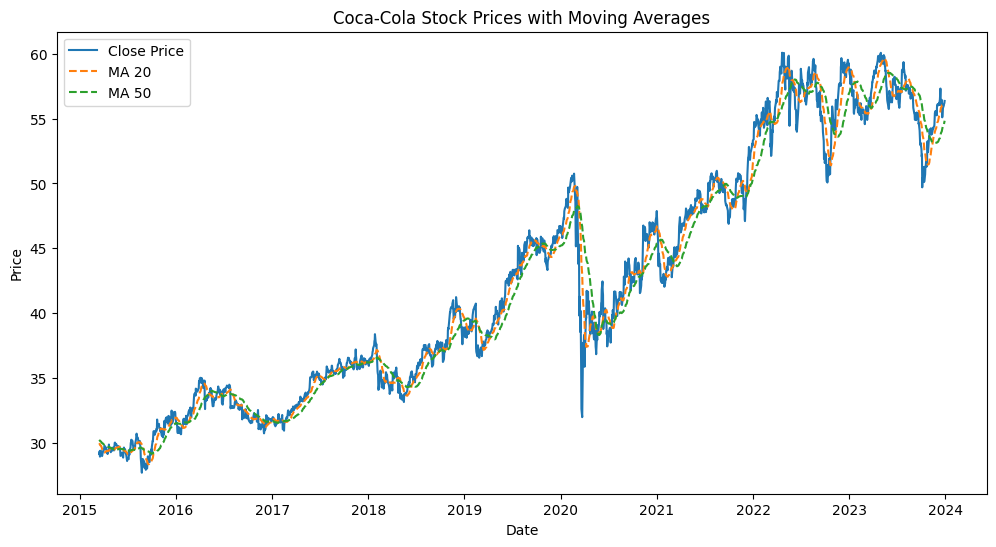

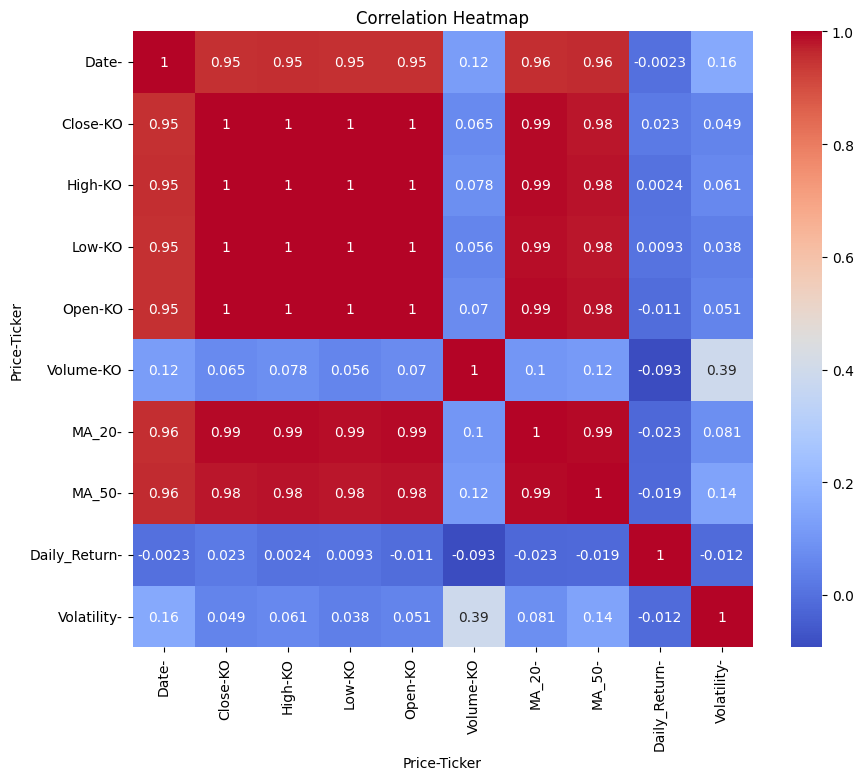

In [5]:

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20', linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='MA 50', linestyle='--')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
optional_cols = ['Dividends', 'Stock Splits']
available_cols = [col for col in optional_cols if col in data.columns]


features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility'] + available_cols
target = 'Close'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [8]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Squared Error: 2.581351563274269
Mean Absolute Error: 1.1533771787863014


In [9]:

live_data = yf.download(ticker, period='1d', interval='1m')
live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(window=20).std()
live_data.fillna(0, inplace=True)

# Ensure feature columns match
live_features = [f for f in features if f in live_data.columns]
latest_features = live_data[live_features].iloc[-1:]
live_prediction = model.predict(latest_features)

print("Predicted Closing Price (Live):", live_prediction[0])


[*********************100%***********************]  1 of 1 completed

Predicted Closing Price (Live): 56.172087821960446
